In [35]:
#import dataset
import pandas as pd
df = pd.read_csv("GROUP_PROJECT_649_DATASET_DATA_CLEANING_ORI.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            698 non-null    int64 
 1   gender         698 non-null    object
 2   budget         698 non-null    int64 
 3   noOfStays      698 non-null    int64 
 4   timing         698 non-null    object
 5   typeOfTravel   698 non-null    object
 6   destination    698 non-null    object
 7   activities     698 non-null    object
 8   transport      698 non-null    object
 9   planning       698 non-null    object
 10  package        698 non-null    object
 11  foodplace      698 non-null    object
 12  attractions    698 non-null    object
 13  accommodation  698 non-null    object
 14  cancelPolicy   698 non-null    object
dtypes: int64(3), object(12)
memory usage: 81.9+ KB


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head(8)

,age,gender,budget,noOfStays,timing,typeOfTravel,destination,activities,transport,planning,package,foodplace,attractions,accommodation,cancelPolicy
0,47,Male,600,3,Middle of the year,Normal travel,Cultural Heritage,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Apartments,Yes
1,47,Male,600,3,Middle of the year,Normal travel,Towns,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Apartments,Yes
2,47,Male,600,3,Middle of the year,Normal travel,Towns,Leisure activities,Personal Vehicle,Self Explore,Yes,Seafood Restaurants,Man-made Attractions,Apartments,Yes
3,31,Male,1000,3,End of the year,Normal travel,Islands,Water activities,Booking a flight,Self Explore,No,Seafood Restaurants,Man-made Attractions,Hotels,Yes
4,37,Male,900,3,End of the year,Normal travel,Countrysides,Water activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Hotels,Yes
5,48,Female,3000,3,Middle of the year,Normal travel,Cultural Heritage,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Natural Attractions,Chalets,No
6,49,Female,800,3,Early of the year,Normal travel,Cultural Heritage,Leisure activities,Personal Vehicle,Self Explore,Yes,Western/Steak house,Natural Attractions,Apartments,Yes
7,49,Female,1000,3,Middle of the year,Normal travel,Countrysides,Leisure activities,Personal Vehicle,Tour,Yes,Seafood Restaurants,Natural Attractions,Chalets,Yes


In [36]:
# Create the bins for the age categories
bins = [0, 24, 30, 35, 40, 45, float('inf')]

# Create the labels for the age categories
labels = ['<25', '25-30', '31-35', '36-40', '41-45', '>45']

# Create the new column and store the age categories
df['Age_Category'] = pd.cut(df['age'], bins=bins, labels=labels)

df.head()

,age,gender,budget,noOfStays,timing,typeOfTravel,destination,activities,transport,planning,package,foodplace,attractions,accommodation,cancelPolicy,Age_Category
0,47,Male,600,3,Middle of the year,Normal travel,Cultural Heritage,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Apartments,Yes,>45
1,47,Male,600,3,Middle of the year,Normal travel,Towns,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Apartments,Yes,>45
2,47,Male,600,3,Middle of the year,Normal travel,Towns,Leisure activities,Personal Vehicle,Self Explore,Yes,Seafood Restaurants,Man-made Attractions,Apartments,Yes,>45
3,31,Male,1000,3,End of the year,Normal travel,Islands,Water activities,Booking a flight,Self Explore,No,Seafood Restaurants,Man-made Attractions,Hotels,Yes,31-35
4,37,Male,900,3,End of the year,Normal travel,Countrysides,Water activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Hotels,Yes,36-40


In [37]:
# Move 'Age_Category' column to index 1
df.insert(1, 'Age_Category', df.pop('Age_Category'))

df.head()

,age,Age_Category,gender,budget,noOfStays,timing,typeOfTravel,destination,activities,transport,planning,package,foodplace,attractions,accommodation,cancelPolicy
0,47,>45,Male,600,3,Middle of the year,Normal travel,Cultural Heritage,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Apartments,Yes
1,47,>45,Male,600,3,Middle of the year,Normal travel,Towns,Leisure activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Apartments,Yes
2,47,>45,Male,600,3,Middle of the year,Normal travel,Towns,Leisure activities,Personal Vehicle,Self Explore,Yes,Seafood Restaurants,Man-made Attractions,Apartments,Yes
3,31,31-35,Male,1000,3,End of the year,Normal travel,Islands,Water activities,Booking a flight,Self Explore,No,Seafood Restaurants,Man-made Attractions,Hotels,Yes
4,37,36-40,Male,900,3,End of the year,Normal travel,Countrysides,Water activities,Personal Vehicle,Self Explore,No,Seafood Restaurants,Man-made Attractions,Hotels,Yes


In [38]:
age_category_counts = df['Age_Category'].value_counts()
print(age_category_counts)

Age_Category
<25      404
25-30    155
>45       62
36-40     40
31-35     24
41-45     13
Name: count, dtype: int64


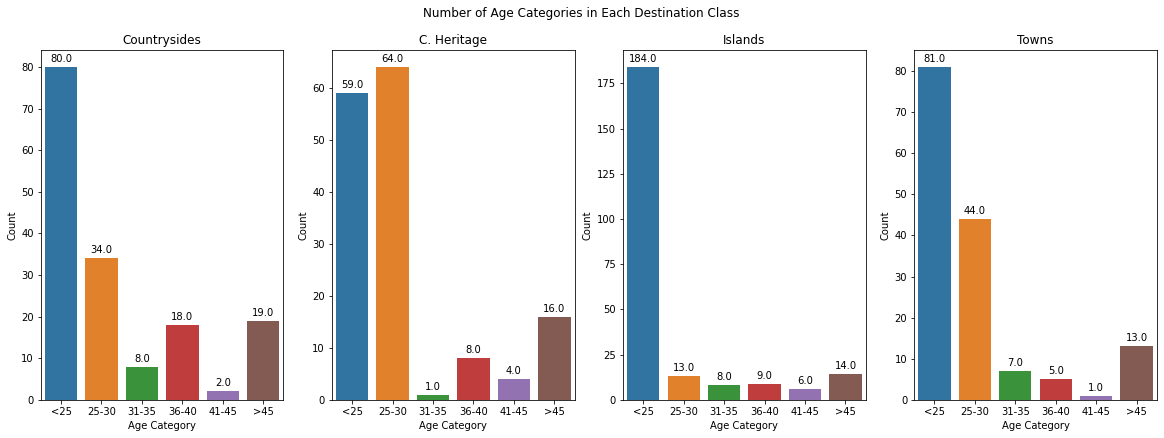

In [8]:
# Visualize each class of destionation into subplots

# Group the data by 'destination' and 'Age_Category'
dest_age_counts = df.groupby(['destination', 'Age_Category']).size().reset_index(name='counts')

# Change name of cultural heritage
dest_age_counts['destination'] = dest_age_counts['destination'].replace({'Cultural Heritage': 'C. Heritage'})

# Get the unique destination classes
destination_classes = dest_age_counts['destination'].unique()

# Set the figure size
plt.figure(figsize=(20, 20))

# Loop through the destination classes and create a subplot for each
for i, destination_class in enumerate(destination_classes):
    plt.subplot(3, 4, i+1)
    class_data = dest_age_counts[dest_age_counts['destination'] == destination_class]
    ax = sns.barplot(x="Age_Category", y="counts", data=class_data)
    plt.title(destination_class)
    plt.xlabel("Age Category")
    plt.ylabel("Count")
    for p in ax.containers:
        for bar in p:
            height = bar.get_height()
            ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
# Add a suptitle for the entire figure
plt.suptitle("Number of Age Categories in Each Destination Class")
plt.subplots_adjust(top=0.95)
plt.show()

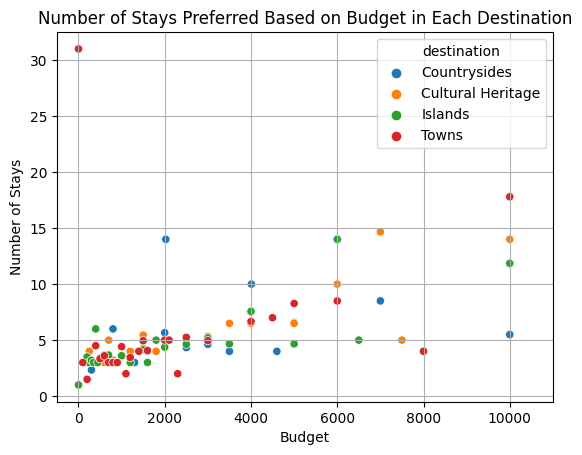

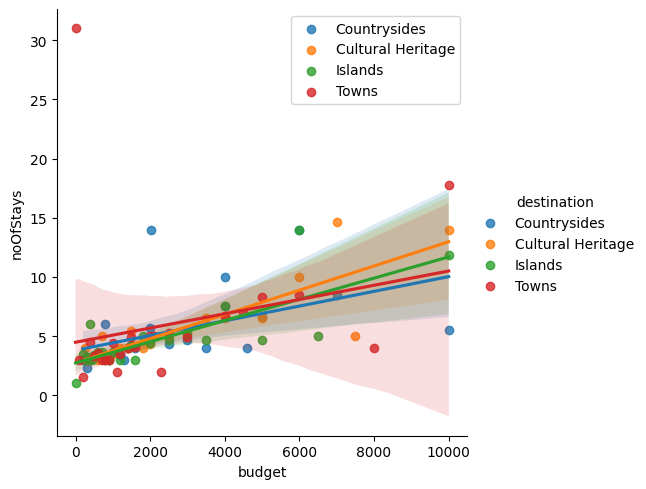

In [22]:
df_less_than_20000 = df[df['budget'] < 20000]

# Group the data by destination and budget and get the mean of noOfStays
dest_budget_count = df_less_than_20000.groupby(['destination', 'budget'])['noOfStays'].mean().reset_index()

# Create scatter plot
g = sns.scatterplot(x="budget", y="noOfStays", hue="destination", data=dest_budget_count)

# Set x and y axis and title
g.set_xlabel("Budget")
g.set_ylabel("Number of Stays")
g.set_title("Number of Stays Preferred Based on Budget in Each Destination")

# Add a regression line
sns.lmplot(x='budget', y='noOfStays', hue='destination', data=dest_budget_count)

# Set x-axis limits
g.set(xlim=(-500, 11000))

# Add grid
g.grid(visible=True)

plt.legend()

plt.show()


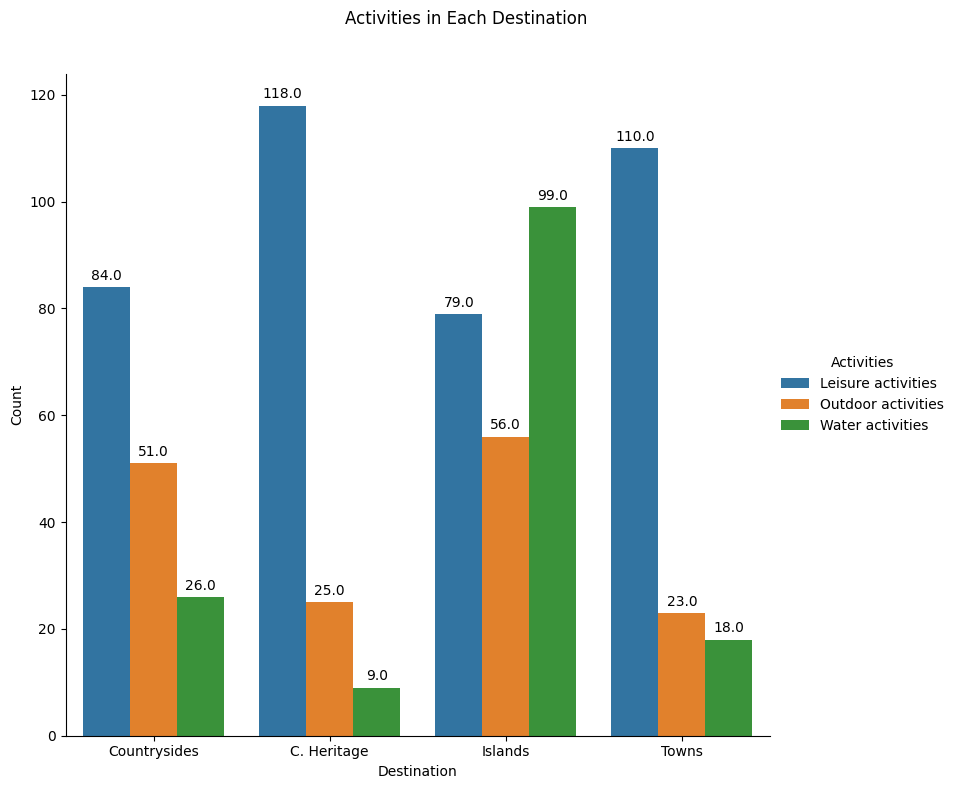

In [12]:

# Group the data by 'destination' and 'Age_Category'
dest_act_counts = df.groupby(['destination', 'activities']).size().reset_index(name='counts')
sns.reset_defaults()

# Change name of cultural heritage
dest_act_counts['destination'] = dest_act_counts['destination'].replace({'Cultural Heritage': 'C. Heritage'})

# Create a bar chart of the counts
g = sns.catplot(x="destination", y="counts", hue="activities", kind="bar", data=dest_act_counts, height=8)

# Set the x-axis label
g.set_axis_labels("Destination", "Count")

# Set the title of the graph
g.fig.suptitle("Activities in Each Destination")
plt.subplots_adjust(top=0.9)

# Change the title of the legend
g._legend.set_title("Activities")


# add value on the top of the bar
for ax in g.axes.flat:
    for p in ax.containers:
        for bar in p:
            height = bar.get_height()
            ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

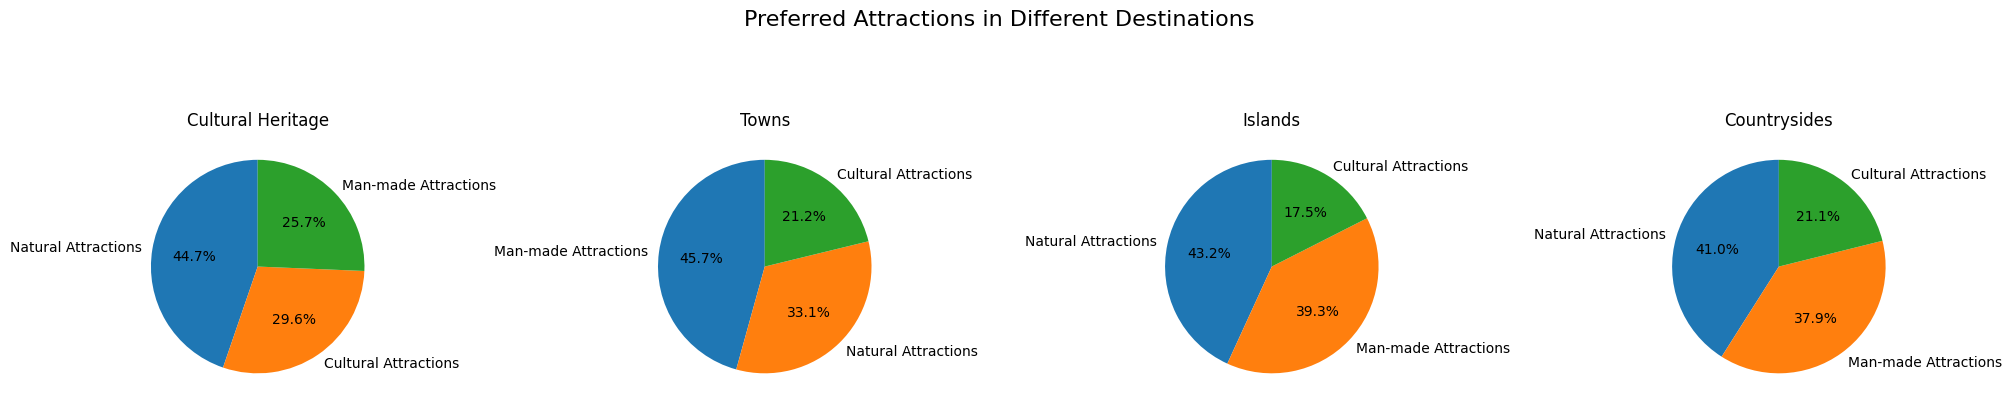

In [51]:
def plot_pie_chart(ax, destination, labels, sizes):
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(destination)

# Get unique destinations in the DataFrame
destinations = df['destination'].unique()

# Create a figure with subplots based on the number of unique destinations
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot pie charts for each destination
for i, destination in enumerate(destinations):
    df_dest = df[df['destination'] == destination]
    attraction_counts = df_dest['attractions'].value_counts()
    labels = attraction_counts.index
    sizes = attraction_counts.values
    plot_pie_chart(axes[i], destination, labels, sizes)

# Add a common title for the whole figure
plt.suptitle('Preferred Attractions in Different Destinations', fontsize=16)

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Display the plots
plt.show()
